In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
# %matplotlib inline

# Load Brent oil price data
price_data = pd.read_csv('../data/BrentOilPrices.csv')

# Convert date and set as index
price_data['Date'] = price_data['Date'].astype(str).str.strip()
price_data['Date'] = pd.to_datetime(price_data['Date'], format='mixed', dayfirst=True)
price_data.set_index('Date', inplace=True)
# Fix 2-digit years (assuming 87 means 1987)
year_mask = price_data.index.year > 2023
if year_mask.any():
    price_data.index = price_data.index.map(
        lambda x: x.replace(year=x.year-100) if x.year > 2023 else x
    )
# Sort by date
price_data.sort_index(inplace=True)

# Display basic information
print("DATA OVERVIEW")
print(f"Time period: {price_data.index.min()} to {price_data.index.max()}")
print(f"Total observations: {len(price_data)}")
print(f"Missing values: {price_data['Price'].isnull().sum()}")
print("\nFirst 5 rows:")
print(price_data.head())
print("\nLast 5 rows:")
print(price_data.tail())

# Load event data
events_data = pd.read_csv('../data/events.csv')
events_data['event_date'] = pd.to_datetime(events_data['event_date'])

print("EVENT DATA")
print(f"Total events: {len(events_data)}")
print("\nEvent categories:")
print(events_data['event_category'].value_counts())
print("\nSample events:")
print(events_data[['event_date', 'event_description', 'event_category']].head(10))

# Calculate basic statistics
print("PRICE STATISTICS")
stats_df = price_data['Price'].describe()
print(stats_df)

# Additional statistics
print(f"\nMedian price: ${price_data['Price'].median():.2f}")
print(f"Price range: ${price_data['Price'].max() - price_data['Price'].min():.2f}")
print(f"Coefficient of variation: {(price_data['Price'].std() / price_data['Price'].mean()) * 100:.2f}%")

# Price distribution by decade
price_data['Decade'] = (price_data.index.year // 10) * 10
decade_stats = price_data.groupby('Decade')['Price'].agg(['mean', 'std', 'min', 'max'])
print("\nDECADE-LEVEL STATISTICS")
print(decade_stats)


DATA OVERVIEW
Time period: 1987-05-20 00:00:00 to 2022-11-14 00:00:00
Total observations: 9011
Missing values: 0

First 5 rows:
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63

Last 5 rows:
            Price
Date             
2022-11-08  96.85
2022-11-09  93.05
2022-11-10  94.25
2022-11-11  96.37
2022-11-14  93.59
EVENT DATA
Total events: 18

Event categories:
event_category
Geopolitical    7
OPEC            6
Economic        5
Name: count, dtype: int64

Sample events:
  event_date                                  event_description event_category
0 1990-08-02              Iraq invades Kuwait - Gulf War begins   Geopolitical
1 1991-01-17  Operation Desert Storm begins - Coalition forc...   Geopolitical
2 1997-11-30               OPEC raises production quotas by 10%           OPEC
3 1998-12-01    OPEC cuts production by 2.1 million barrels/day           OPEC
4 2001-09-11            9/11 terrorist attacks in Uni

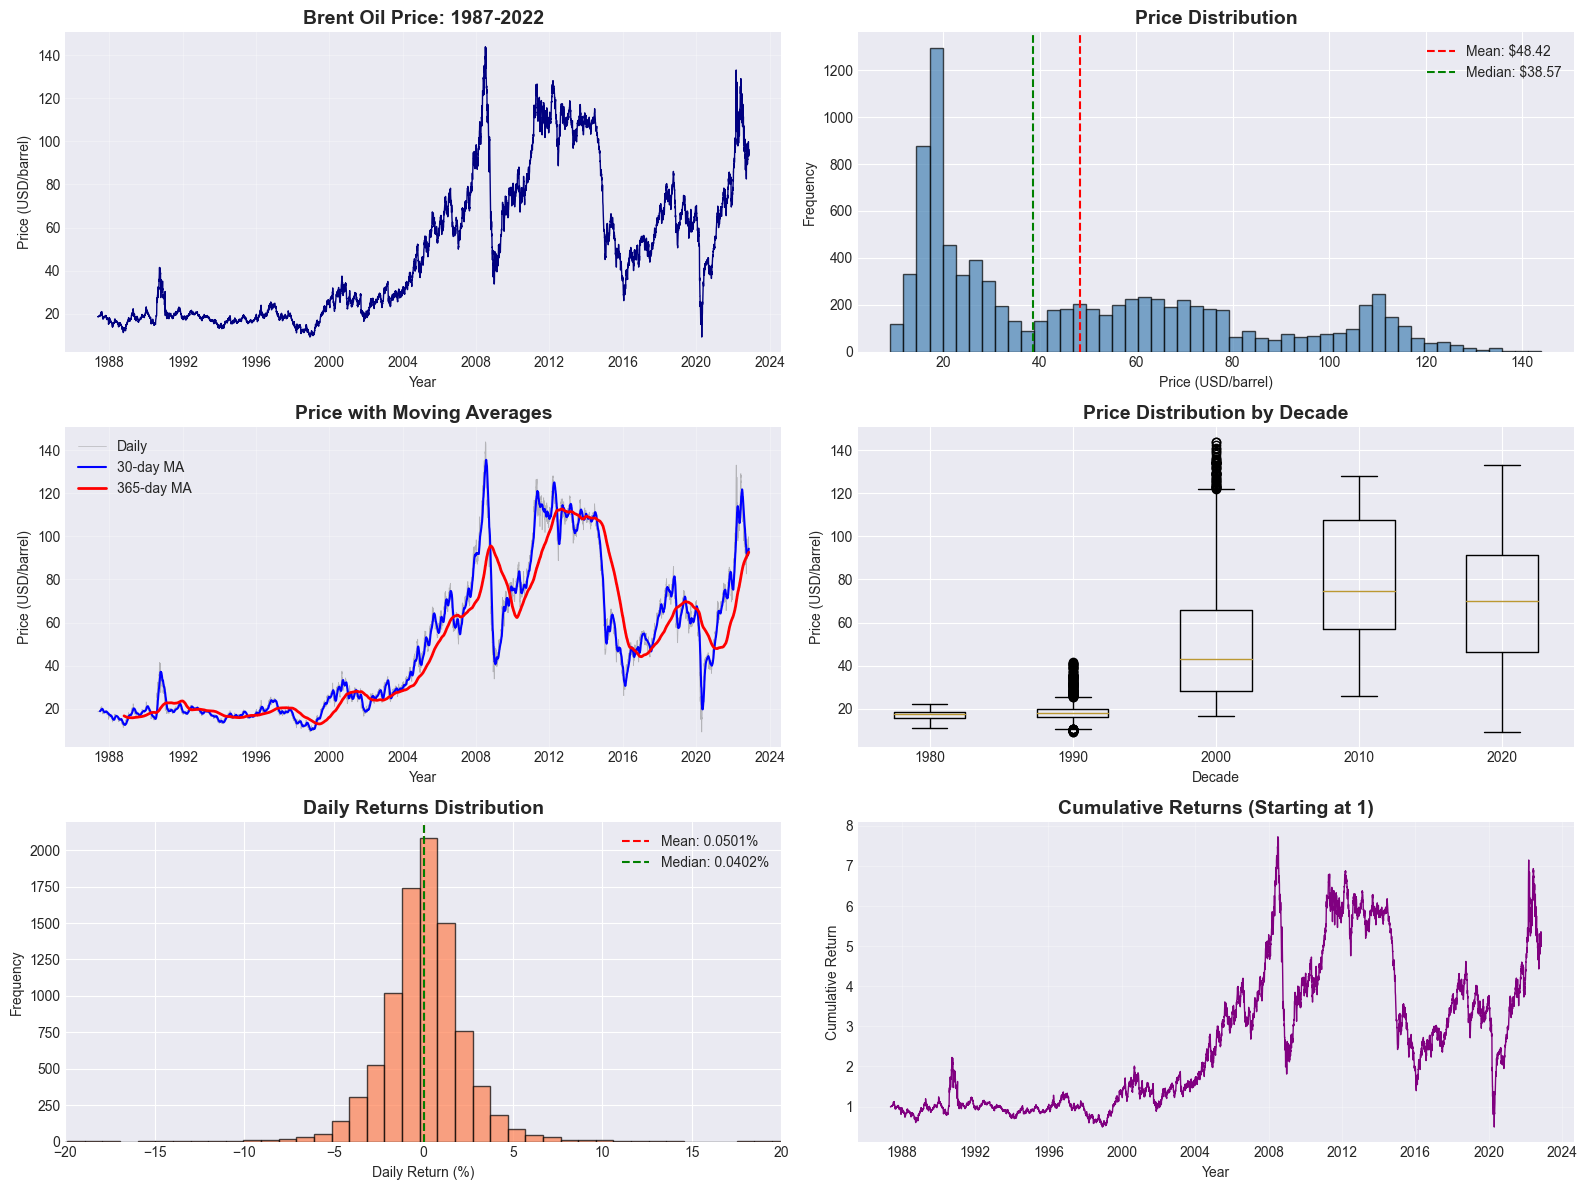

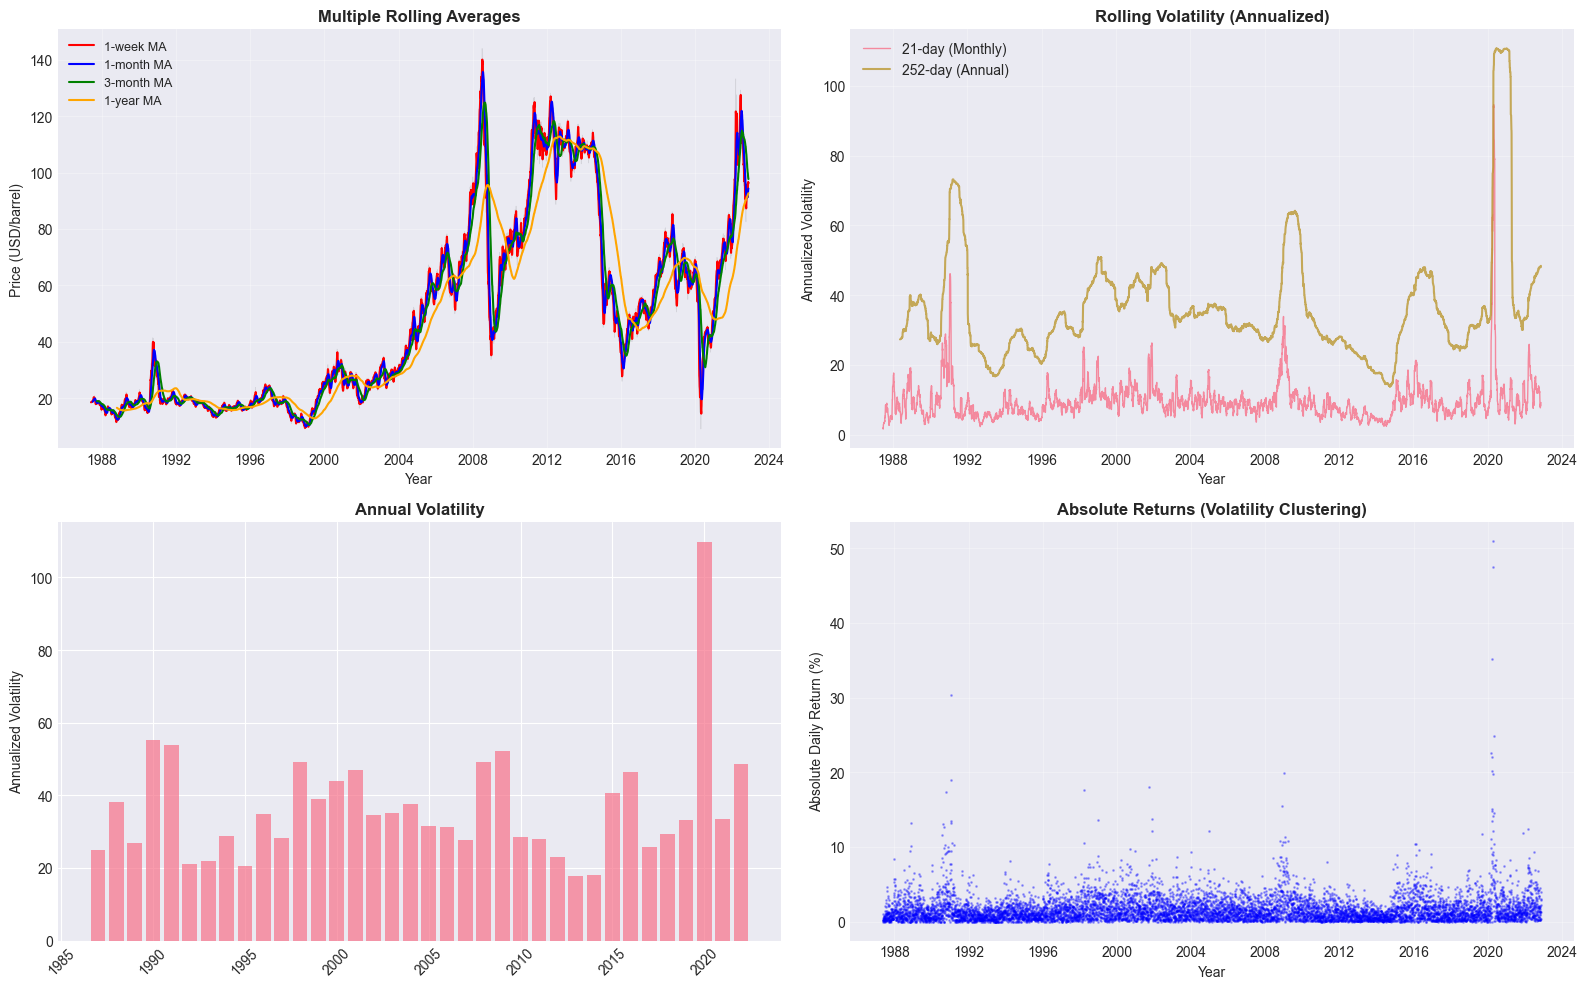

STATIONARITY TESTING 

1. Augmented Dickey-Fuller Test (Prices):
   ADF Statistic: -1.9939
   p-value: 0.2893
   Result: Prices are non-stationary

2. Augmented Dickey-Fuller Test (Returns):
   ADF Statistic: -17.1117
   p-value: 0.0000
   Result: Returns are stationary

3. KPSS Test (Prices):
   KPSS Statistic: 9.5588
   p-value: 0.0100
   Result: Prices are non-stationary (reject null)


C:\Users\admin\AppData\Local\Temp\ipykernel_21572\3662073183.py:158: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(price_data['Price'].dropna(), regression='c')


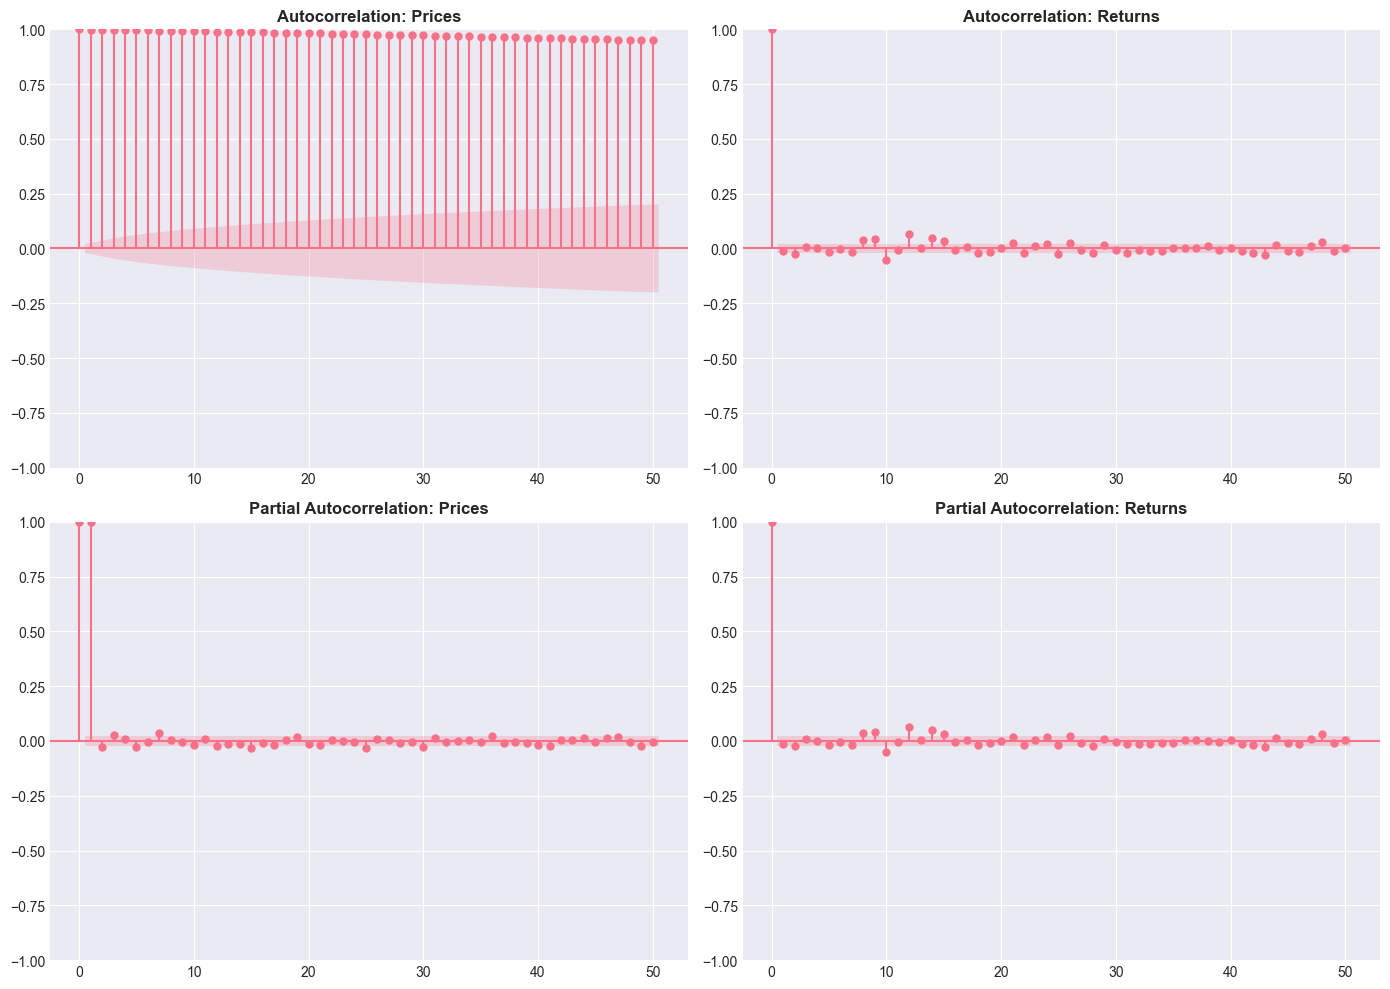

VOLATILITY ANALYSIS

Extreme returns (> 3 std dev):
  Positive extremes: 54
  Negative extremes: 51
  Total extremes: 105 (1.17% of data)

Ljung-Box Test for ARCH Effects:
        lb_stat  lb_pvalue
5   2255.742832        0.0
10  3077.100100        0.0
20  4707.736397        0.0

Shapiro-Wilk Normality Test:
  Statistic: 0.8767
  p-value: 0.0000
  Result: Returns are NOT normally distributed


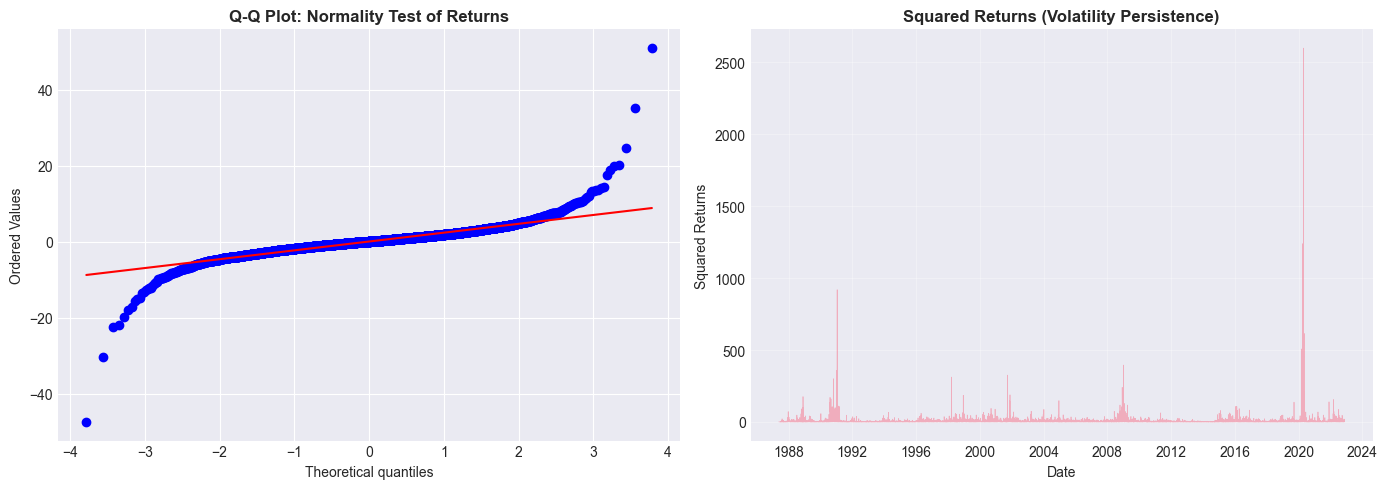

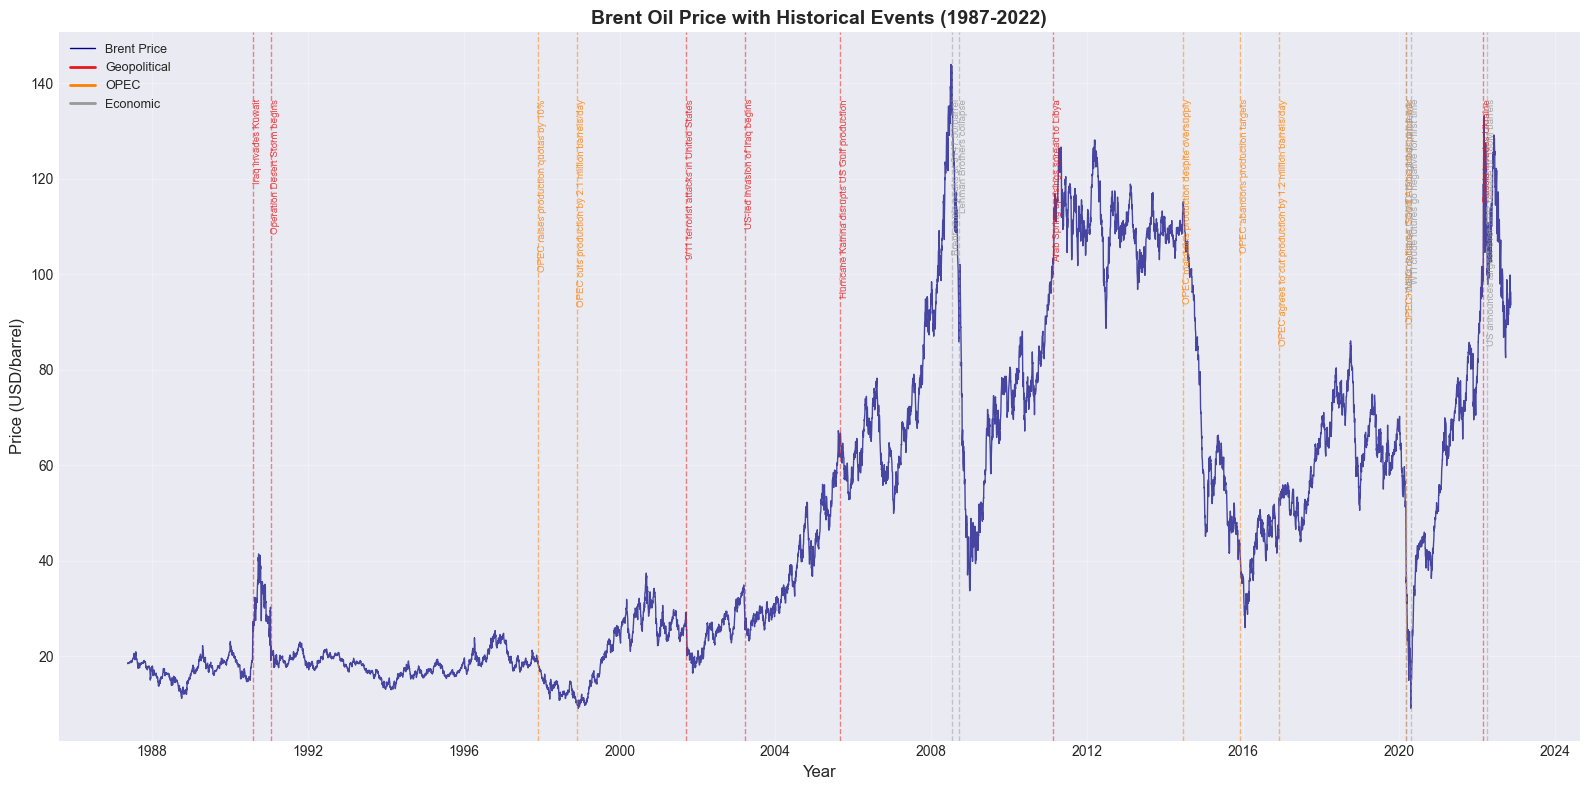

ANALYSIS SUMMARY

1. DATA OVERVIEW:
   Period: 1987-05-20 to 2022-11-14
   Total days: 9,011
   Missing prices: 0

2. PRICE STATISTICS:
   Mean price: $48.42
   Median price: $38.57
   Minimum price: $9.10
   Maximum price: $143.95
   Standard deviation: $32.86

3. RETURN STATISTICS:
   Mean daily return: 0.0501%
   Daily volatility: 2.5255%
   Annualized volatility: 40.0910%
   Skewness: 0.3116
   Kurtosis: 45.4315

4. STATIONARITY RESULTS:
   Prices ADF p-value: 0.2893
   Returns ADF p-value: 0.0000
   Prices are stationary: False
   Returns are stationary: True

5. EVENT SUMMARY:
   Total events analyzed: 18
   Geopolitical events: 7
   OPEC events: 6
   Economic events: 5

6. VOLATILITY INSIGHTS:
   Extreme days (>3σ): 105 (1.17%)
   ARCH effects present: True
   Normality rejected: True

END OF ANALYSIS
KEY INSIGHTS 

Price Range: $9.10 - $143.95
Most Volatile Year: 2020
Avg Annual Vol: 3652.32%
Extreme Days Pct: 1.17%
Stationary Series: Returns (not Prices)
Event Categories: 3

 

In [5]:

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Full time series
axes[0, 0].plot(price_data.index, price_data['Price'], linewidth=1, color='navy')
axes[0, 0].set_title('Brent Oil Price: 1987-2022', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Price (USD/barrel)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution histogram
axes[0, 1].hist(price_data['Price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].axvline(price_data['Price'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${price_data["Price"].mean():.2f}')
axes[0, 1].axvline(price_data['Price'].median(), color='green', linestyle='--', 
                   label=f'Median: ${price_data["Price"].median():.2f}')
axes[0, 1].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Price (USD/barrel)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# 3. Rolling statistics
rolling_mean_30 = price_data['Price'].rolling(window=30).mean()
rolling_mean_365 = price_data['Price'].rolling(window=365).mean()

axes[1, 0].plot(price_data.index, price_data['Price'], alpha=0.5, linewidth=0.5, color='gray', label='Daily')
axes[1, 0].plot(rolling_mean_30.index, rolling_mean_30, 'b-', linewidth=1.5, label='30-day MA')
axes[1, 0].plot(rolling_mean_365.index, rolling_mean_365, 'r-', linewidth=2, label='365-day MA')
axes[1, 0].set_title('Price with Moving Averages', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Price (USD/barrel)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Boxplot by decade
decade_data = [price_data[price_data['Decade'] == d]['Price'] 
               for d in sorted(price_data['Decade'].unique())]
box = axes[1, 1].boxplot(decade_data, labels=sorted(price_data['Decade'].unique()))
axes[1, 1].set_title('Price Distribution by Decade', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Decade')
axes[1, 1].set_ylabel('Price (USD/barrel)')

# 5. Returns calculation
price_data['Returns'] = price_data['Price'].pct_change() * 100
price_data['Log_Returns'] = np.log(price_data['Price'] / price_data['Price'].shift(1))

# Remove NaN values
returns_clean = price_data['Returns'].dropna()

# Returns distribution
axes[2, 0].hist(returns_clean, bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[2, 0].axvline(returns_clean.mean(), color='red', linestyle='--', 
                   label=f'Mean: {returns_clean.mean():.4f}%')
axes[2, 0].axvline(returns_clean.median(), color='green', linestyle='--', 
                   label=f'Median: {returns_clean.median():.4f}%')
axes[2, 0].set_xlim([-20, 20])  # Focus on ±20% range
axes[2, 0].set_title('Daily Returns Distribution', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Daily Return (%)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()

# 6. Cumulative returns
cumulative_returns = (1 + returns_clean/100).cumprod()
axes[2, 1].plot(cumulative_returns.index, cumulative_returns, linewidth=1, color='purple')
axes[2, 1].set_title('Cumulative Returns (Starting at 1)', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Cumulative Return')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/initial_eda.png', dpi=300, bbox_inches='tight')
plt.show()

# Advanced trend analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Multiple rolling windows
windows = [7, 30, 90, 365]
window_labels = ['1-week', '1-month', '3-month', '1-year']
colors = ['red', 'blue', 'green', 'orange']

axes[0, 0].plot(price_data.index, price_data['Price'], alpha=0.2, linewidth=0.5, color='gray')
for i, window in enumerate(windows):
    rolling_mean = price_data['Price'].rolling(window=window).mean()
    axes[0, 0].plot(rolling_mean.index, rolling_mean, 
                   color=colors[i], linewidth=1.5, 
                   label=f'{window_labels[i]} MA')
axes[0, 0].set_title('Multiple Rolling Averages', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Price (USD/barrel)')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# 2. Rolling volatility
rolling_vol_21 = returns_clean.rolling(window=21).std() * np.sqrt(21)
rolling_vol_252 = returns_clean.rolling(window=252).std() * np.sqrt(252)

axes[0, 1].plot(rolling_vol_21.index, rolling_vol_21, linewidth=1, label='21-day (Monthly)', alpha=0.8)
axes[0, 1].plot(rolling_vol_252.index, rolling_vol_252, linewidth=1.5, label='252-day (Annual)', alpha=0.8)
axes[0, 1].set_title('Rolling Volatility (Annualized)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Annualized Volatility')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Volatility by year
annual_vol = returns_clean.resample('Y').std() * np.sqrt(252)
annual_vol_df = pd.DataFrame({
    'Year': annual_vol.index.year,
    'Volatility': annual_vol.values
})

axes[1, 0].bar(annual_vol_df['Year'], annual_vol_df['Volatility'], alpha=0.7)
axes[1, 0].set_title('Annual Volatility', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 0].set_ylabel('Annualized Volatility')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Returns vs Absolute Returns (volatility clustering)
abs_returns = returns_clean.abs()
axes[1, 1].scatter(returns_clean.index, abs_returns, alpha=0.3, s=1, color='blue')
axes[1, 1].set_title('Absolute Returns (Volatility Clustering)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Absolute Daily Return (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/trend_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("STATIONARITY TESTING ")

# ADF test on prices
adf_result_price = adfuller(price_data['Price'].dropna())
print(f"\n1. Augmented Dickey-Fuller Test (Prices):")
print(f"   ADF Statistic: {adf_result_price[0]:.4f}")
print(f"   p-value: {adf_result_price[1]:.4f}")
if adf_result_price[1] < 0.05:
    print("   Result: Prices are stationary (reject null hypothesis)")
else:
    print("   Result: Prices are non-stationary")

# ADF test on returns
adf_result_returns = adfuller(returns_clean)
print(f"\n2. Augmented Dickey-Fuller Test (Returns):")
print(f"   ADF Statistic: {adf_result_returns[0]:.4f}")
print(f"   p-value: {adf_result_returns[1]:.4f}")
if adf_result_returns[1] < 0.05:
    print("   Result: Returns are stationary")
else:
    print("   Result: Returns are non-stationary")

# KPSS test
try:
    kpss_result = kpss(price_data['Price'].dropna(), regression='c')
    print(f"\n3. KPSS Test (Prices):")
    print(f"   KPSS Statistic: {kpss_result[0]:.4f}")
    print(f"   p-value: {kpss_result[1]:.4f}")
    if kpss_result[1] < 0.05:
        print("   Result: Prices are non-stationary (reject null)")
    else:
        print("   Result: Prices are stationary")
except Exception as e:
    print(f"   KPSS test error: {e}")

# Autocorrelation plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_acf(price_data['Price'].dropna(), lags=50, ax=axes[0, 0])
axes[0, 0].set_title('Autocorrelation: Prices', fontsize=12, fontweight='bold')

plot_acf(returns_clean, lags=50, ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation: Returns', fontsize=12, fontweight='bold')

plot_pacf(price_data['Price'].dropna(), lags=50, ax=axes[1, 0])
axes[1, 0].set_title('Partial Autocorrelation: Prices', fontsize=12, fontweight='bold')

plot_pacf(returns_clean, lags=50, ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation: Returns', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/stationarity_tests.png', dpi=300, bbox_inches='tight')
plt.show()

from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox

print("VOLATILITY ANALYSIS")

# Calculate extreme returns
extreme_up = (returns_clean > returns_clean.mean() + 3*returns_clean.std()).sum()
extreme_down = (returns_clean < returns_clean.mean() - 3*returns_clean.std()).sum()

print(f"\nExtreme returns (> 3 std dev):")
print(f"  Positive extremes: {extreme_up}")
print(f"  Negative extremes: {extreme_down}")
print(f"  Total extremes: {extreme_up + extreme_down} ({((extreme_up + extreme_down)/len(returns_clean)*100):.2f}% of data)")

# Ljung-Box test for ARCH effects
lb_test = acorr_ljungbox(returns_clean**2, lags=[5, 10, 20], return_df=True)
print(f"\nLjung-Box Test for ARCH Effects:")
print(lb_test)

# Normality test
shapiro_stat, shapiro_p = stats.shapiro(returns_clean.dropna().sample(min(5000, len(returns_clean))))
print(f"\nShapiro-Wilk Normality Test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  p-value: {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("  Result: Returns are NOT normally distributed")
else:
    print("  Result: Returns are normally distributed")

# Volatility clustering visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# QQ plot
stats.probplot(returns_clean.dropna(), dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Normality Test of Returns', fontsize=12, fontweight='bold')

# Volatility persistence
axes[1].plot(returns_clean**2, alpha=0.5, linewidth=0.5)
axes[1].set_title('Squared Returns (Volatility Persistence)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Squared Returns')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize price with events
fig, ax = plt.subplots(figsize=(16, 8))

# Plot price
ax.plot(price_data.index, price_data['Price'], linewidth=1, alpha=0.7, 
        color='navy', label='Brent Oil Price')

# Add events with different colors by category
categories = events_data['event_category'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(categories)))
color_map = dict(zip(categories, colors))

# Create legend handles
legend_handles = []

# Plot events
for idx, event in events_data.iterrows():
    color = color_map[event['event_category']]
    
    # Add vertical line
    ax.axvline(x=event['event_date'], color=color, alpha=0.5, 
               linestyle='--', linewidth=1)
    
    # Add text annotation
    event_name = event['event_description'].split(' - ')[0]
    ax.text(event['event_date'], price_data['Price'].max() * 0.95,
           event_name,
           rotation=90, verticalalignment='top',
           fontsize=7, alpha=0.8, color=color)

# Create custom legend for event categories
for category, color in color_map.items():
    legend_handles.append(plt.Line2D([0], [0], color=color, 
                                     linewidth=2, label=category))

ax.set_title('Brent Oil Price with Historical Events (1987-2022)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Price (USD/barrel)', fontsize=12)
ax.grid(True, alpha=0.3)

# Add price legend and event category legend
price_handle = plt.Line2D([0], [0], color='navy', linewidth=1, label='Brent Price')
ax.legend(handles=[price_handle] + legend_handles, 
          loc='upper left', fontsize=9, framealpha=0.9)

plt.tight_layout()
plt.savefig('../reports/price_with_events.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate comprehensive summary
print("ANALYSIS SUMMARY\n")

# Basic statistics
print("1. DATA OVERVIEW:")
print(f"   Period: {price_data.index.min().date()} to {price_data.index.max().date()}")
print(f"   Total days: {len(price_data):,}")
print(f"   Missing prices: {price_data['Price'].isnull().sum()}")

# Price statistics
print("\n2. PRICE STATISTICS:")
print(f"   Mean price: ${price_data['Price'].mean():.2f}")
print(f"   Median price: ${price_data['Price'].median():.2f}")
print(f"   Minimum price: ${price_data['Price'].min():.2f}")
print(f"   Maximum price: ${price_data['Price'].max():.2f}")
print(f"   Standard deviation: ${price_data['Price'].std():.2f}")

# Return statistics
print("\n3. RETURN STATISTICS:")
print(f"   Mean daily return: {returns_clean.mean():.4f}%")
print(f"   Daily volatility: {returns_clean.std():.4f}%")
print(f"   Annualized volatility: {returns_clean.std() * np.sqrt(252):.4f}%")
print(f"   Skewness: {returns_clean.skew():.4f}")
print(f"   Kurtosis: {returns_clean.kurtosis():.4f}")

# Stationarity results
print("\n4. STATIONARITY RESULTS:")
print(f"   Prices ADF p-value: {adf_result_price[1]:.4f}")
print(f"   Returns ADF p-value: {adf_result_returns[1]:.4f}")
print(f"   Prices are stationary: {adf_result_price[1] < 0.05}")
print(f"   Returns are stationary: {adf_result_returns[1] < 0.05}")

# Event summary
print("\n5. EVENT SUMMARY:")
print(f"   Total events analyzed: {len(events_data)}")
for category in categories:
    count = (events_data['event_category'] == category).sum()
    print(f"   {category} events: {count}")

# Volatility insights
print("\n6. VOLATILITY INSIGHTS:")
print(f"   Extreme days (>3σ): {extreme_up + extreme_down} ({((extreme_up + extreme_down)/len(returns_clean)*100):.2f}%)")
print(f"   ARCH effects present: {lb_test['lb_pvalue'].iloc[-1] < 0.05}")
print(f"   Normality rejected: {shapiro_p < 0.05}")

print("\nEND OF ANALYSIS")

# Create insights summary
insights = {
    "price_range": f"${price_data['Price'].min():.2f} - ${price_data['Price'].max():.2f}",
    "most_volatile_year": annual_vol_df.loc[annual_vol_df['Volatility'].idxmax(), 'Year'],
    "avg_annual_vol": f"{annual_vol_df['Volatility'].mean():.2%}",
    "extreme_days_pct": f"{((extreme_up + extreme_down)/len(returns_clean)*100):.2f}%",
    "stationary_series": "Returns (not Prices)",
    "event_categories": len(categories)
}

print("KEY INSIGHTS \n")
for key, value in insights.items():
    key_formatted = key.replace('_', ' ').title()
    print(f"{key_formatted}: {value}")

print("\n NEXT STEPS")
print("1. Proceed to change point detection using Bayesian methods")
print("2. Correlate detected change points with historical events")
print("3. Analyze pre/post change point regime characteristics")
print("4. Generate final report with statistical evidence")
print("5. Prepare stakeholder presentation with key findings")